# Evaluating tracking pervormances.

This evaluation is done by comparing on the fly motion track estimation with ground truth detection.
referr to https://www.researchgate.net/publication/228873288_Performance_evaluation_of_object_tracking_algorithms
for metrics.

Populating the interactive namespace from numpy and matplotlib


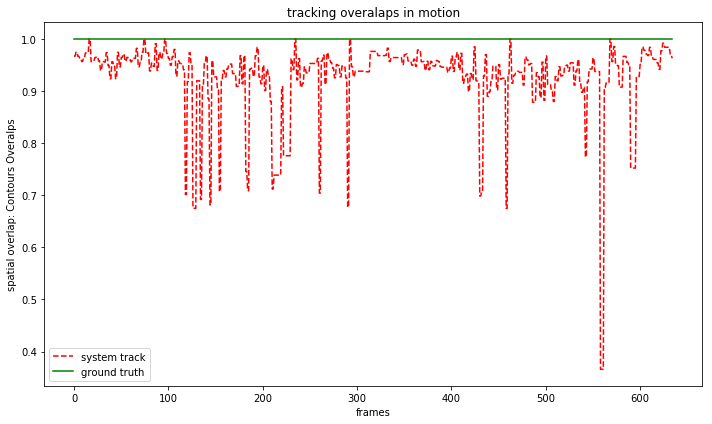

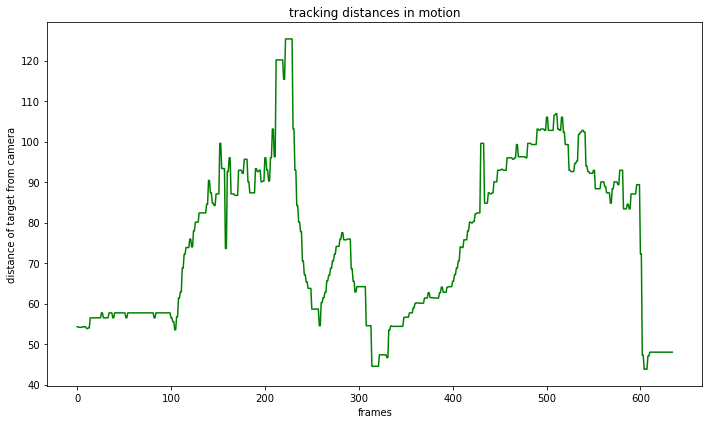

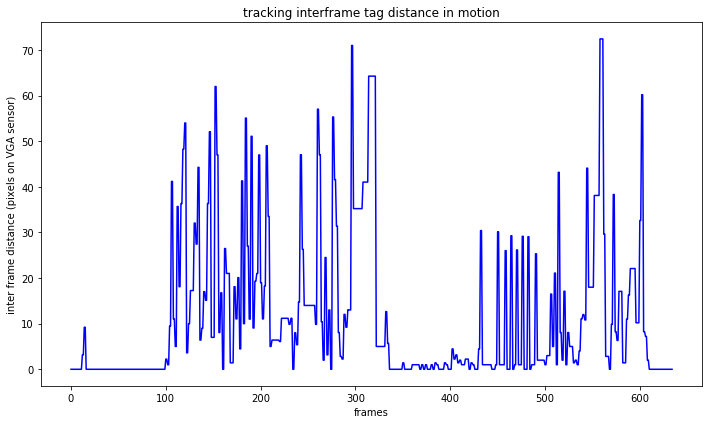

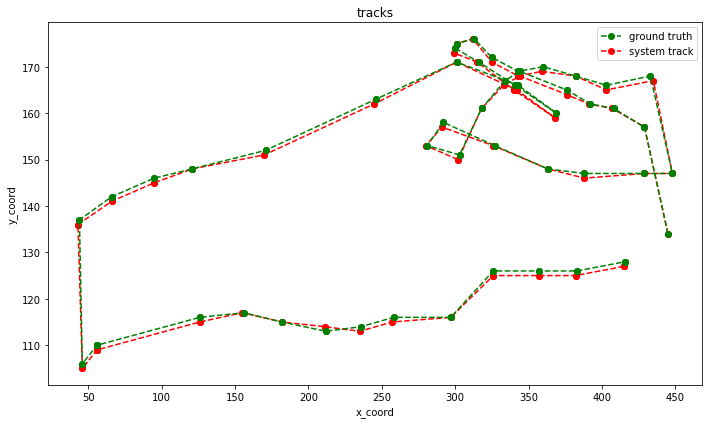

TME: 0.020
TMED: 0.010


In [53]:
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy as np
from os import listdir
from os.path import isfile, join

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

def dist(a,b):
    return np.linalg.norm(np.array(a)-np.array(b))

def calc_TME(GTx,GTy,STx,STy):
    """
    Normalized on VGA diagonal
    """
    diag = np.sqrt(640**2 + 480**2)
    TME = 0
    for i in range(len(GTx)):
        TME += dist([GTx[i],GTy[i]],[STx[i],STx[i]])
    TME /= len(GTx)*diag
    return TME

def calc_TMED(GTx,GTy,STx,STy,TME):
    """
    standard dev, Normalized on VGA diagonal
    """
    diag = np.sqrt(640**2 + 480**2)
    TMED =0
    for i in range(len(GTx)):
        TMED += ((dist([GTx[i],GTy[i]],[STx[i],STx[i]])/float(diag)) - TME)**2
    TMED = np.sqrt(TMED/float(len(GTx)-1))
    return TMED

mypath = 'track_eval'
file_name = 'evaluation.json'
file_name_1 = 'track.json'
db = None
with open(join(mypath,file_name)) as data_file:
    db = json.load(data_file)
    
a_vals = db['a_vals']
inner_ds = db['inter_ds']
dists = db['dists']

all_vals = zip(dists,inner_ds,a_vals)

plt.title("tracking overalaps in motion")
plot1, = plt.plot(range(len(a_vals[1:])), a_vals[1:], '--r', label = 'system track')
plot2, = plt.plot(range(len(a_vals[1:])), [1.0 for x in range(len(a_vals[1:]))], 'g', label = 'ground truth')

plt.legend(handles=[plot1,plot2])
plt.ylabel('spatial overlap: Contours Overalps')
plt.xlabel('frames')
plt.tight_layout() 
plt.show()

plt.title("tracking distances in motion")
plt.plot(range(len(dists[1:])), dists[1:], '-g')
plt.ylabel('distance of target from camera')
plt.xlabel('frames')
plt.tight_layout() 
plt.show()

plt.title("tracking interframe tag distance in motion")
plt.plot(range(len(inner_ds[1:])), inner_ds[1:], '-b')
plt.ylabel('inter frame distance (pixels on VGA sensor)')
plt.xlabel('frames')
plt.tight_layout() 
plt.show()

with open(join(mypath,file_name_1)) as data_file:
    db = json.load(data_file)
    
GTcs_x, GTcs_y = db['GTcs_x'],db['GTcs_y']
STcs_x, STcs_y = db['STcs_x'],db['STcs_y']
plt.title("tracks")
plot2, = plt.plot(STcs_x, STcs_y, '--r', marker='o', label = 'system track')
plot1, = plt.plot(GTcs_x, GTcs_y, '--g', marker='o', label = 'ground truth')

plt.ylabel('y_coord')
plt.xlabel('x_coord')
plt.legend(handles=[plot1,plot2])
plt.tight_layout() 
plt.show()

TME = calc_TME(GTcs_x,GTcs_y,STcs_x,STcs_y)
TMED = calc_TMED(GTcs_x,GTcs_y,STcs_x,STcs_y,TME)

print "TME: %.3f" % TME
print "TMED: %.3f" % TMED
    